# Agentic Patterns Lab

This lab demonstrates several agentic patterns. Each section below contains the full contents of an important agentic pattern.

# Reflection Pattern

The first pattern we are going to implement is the **reflection pattern**.


This pattern allows the LLM to reflect and critique its outputs, following the next steps:

1. The LLM **generates** a candidate output.
2. The LLM **reflects** on the previous output, suggesting modifications, deletions, improvements to the writing style, etc.
3. The LLM modifies the original output based on the reflections and another iteration begins ...

**Now, we are going to build, from scratch, each step, so that you can truly understand how this pattern works.**

## Generation Step

The first thing we need to consider is:

> What do we want to generate?

For this example, We are going to test the Python coding skills of Llama3 70B (that's the LLM we are going to use for all the tutorials). In particular, we are going to ask our LLM to code a famous sorting algorithm: **Merge Sort**.

---


In [2]:
!pip install groq
!pip install python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 5.5 MB/s eta 0:00:00


### Groq Client and relevant imports

In [3]:
from pprint import pprint
from groq import Groq
from dotenv import load_dotenv
from IPython.display import display_markdown
import os

# Set Groq API key
os.environ["GROQ_API_KEY"]= "*****************************************"
client = Groq()

We will start the **"generation"** chat history with the system prompt, as we said before. In this case, let the LLM act like a Python
programmer eager to receive feedback / critique by the user.

In [4]:
generation_chat_history = [
    {
        "role": "system",
        "content": "You are a Python programmer tasked with generating high quality Python code."
        "Your task is to Generate the best content possible for the user's request. If the user provides critique,"
        "respond with a revised version of your previous attempt."
    }
]

Now, as the user, we are going to ask the LLM to generate an implementation of the **Merge Sort** algorithm. Just add a new message with the **user** role to the chat history.

In [5]:
#TODO
generation_chat_history.append(
    {"role": "user",
     "content": "write a python program to implement merge sort algorithm."}
)

Let's generate the first version of the essay.

In [6]:
mergesort_code = client.chat.completions.create(
    messages=generation_chat_history,
    model="llama3-70b-8192"
).choices[0].message.content



generation_chat_history.append(
    {
        "role": "assistant",
        "content": mergesort_code
    }
)

In [7]:
display_markdown(mergesort_code, raw=True)

Here is a Python program to implement the Merge Sort algorithm:
```
def merge_sort(arr):
    """
    Sorts an array of integers using the Merge Sort algorithm.

    Time complexity: O(n log n)
    Space complexity: O(n)

    :param arr: The array to be sorted
    :return: The sorted array
    """
    if len(arr) <= 1:
        return arr  # Base case: already sorted

    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]

    left = merge_sort(left)
    right = merge_sort(right)

    return merge(left, right)


def merge(left, right):
    """
    Merges two sorted arrays into a single sorted array.

    :param left: The first sorted array
    :param right: The second sorted array
    :return: The merged sorted array
    """
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result.extend(left[i:])
    result.extend(right[j:])

    return result


# Example usage
arr = [5, 2, 8, 3, 1, 6, 4]
arr = merge_sort(arr)
print("Sorted array:", arr)
```
This program defines two functions: `merge_sort` and `merge`. The `merge_sort` function recursively splits the input array into two halves, sorts each half using the `merge_sort` function, and then merges the two sorted halves using the `merge` function. The `merge` function takes two sorted arrays as input and merges them into a single sorted array.

The time complexity of this implementation is O(n log n), and the space complexity is O(n), where n is the length of the input array.

Let me know if you have any questions or if you'd like me to revise anything!

## Reflection Step

Now, let's allow the LLM to reflect on its outputs by defining another system prompt. This system prompt will tell the LLM to act as computer scientist wizard.

In [9]:
#TODO
reflection_chat_history = [
    {
        "role": "system",
        "content": "you are a Python programming expert with deep computer science knowledge. your role is to evaluate the provided Python code, analyzing its correctness, efficiency, readability, and style, and offer targeted suggestions for improvement. Provide a thorough critique with actionable recommendations and enhanced code examples."
    }
]

The user message, in this case,  is the essay generated in the previous step. We simply add the `mergesort_code` to the `reflection_chat_history`.

In [10]:
#TODO
reflection_chat_history.append(
    {
        "role" : "user",
        "content" : mergesort_code
    }
)

Now, generate a critique to the Python code. See the wy mergesort_code was created above

In [11]:
#TODO

critique = client.chat.completions.create(
    messages=reflection_chat_history,
    model="llama3-70b-8192"
).choices[0].message.content
reflection_chat_history.append(
    {
        "role": "assistant",
        "content": critique
    }
)

In [12]:
display_markdown(critique, raw=True)

Your implementation of the Merge Sort algorithm is correct and efficient. Here's a thorough critique with actionable recommendations and enhanced code examples:

**Code Organization and Style**

* The code is well-organized, and the function names are descriptive and follow the conventional naming conventions in Python (i.e., underscores instead of camel case).
* The docstrings are informative and provide a brief explanation of each function's purpose, parameters, and return values. However, it's a good practice to include a blank line between the function definition and the docstring.
* The code adheres to PEP 8 guidelines for code style, with proper indentation, spacing, and line length.

**Performance and Efficiency**

* The time complexity of O(n log n) is optimal for the Merge Sort algorithm, and your implementation achieves this complexity.
* The space complexity of O(n) is also optimal, as the algorithm requires a temporary array to store the merged result.

**Code Readability and Maintainability**

* The `merge` function is easy to understand, with clear variable names and a straightforward implementation.
* In the `merge_sort` function, you could consider adding a comment to explain the recursive approach and the purpose of the `mid` variable.
* Instead of using `i` and `j` as index variable names, consider using more descriptive names like `left_index` and `right_index` to improve code readability.

**Minor Suggestions**

* In the `merge` function, you could use a more descriptive variable name instead of `result` (e.g., `merged_array`).
* In the `merge_sort` function, you could add a check to ensure that the input array is not empty before proceeding with the sorting process.

**Enhanced Code Example**

Here's the refactored code with the suggested improvements:
```python
def merge_sort(arr):
    """
    Sorts an array of integers using the Merge Sort algorithm.

    Time complexity: O(n log n)
    Space complexity: O(n)

    :param arr: The array to be sorted
    :return: The sorted array
    """
    if not arr:  # Check for empty input array
        return arr

    if len(arr) <= 1:
        return arr  # Base case: already sorted

    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]

    # Recursively sort and merge the two halves
    left = merge_sort(left)
    right = merge_sort(right)

    return merge(left, right)


def merge(left, right):
    """
    Merges two sorted arrays into a single sorted array.

    :param left: The first sorted array
    :param right: The second sorted array
    :return: The merged sorted array
    """
    merged_array = []
    left_index = right_index = 0

    while left_index < len(left) and right_index < len(right):
        if left[left_index] <= right[right_index]:
            merged_array.append(left[left_index])
            left_index += 1
        else:
            merged_array.append(right[right_index])
            right_index += 1

    merged_array.extend(left[left_index:])
    merged_array.extend(right[right_index:])

    return merged_array


# Example usage
arr = [5, 2, 8, 3, 1, 6, 4]
arr = merge_sort(arr)
print("Sorted array:", arr)
```
Overall, your implementation of the Merge Sort algorithm is correct and efficient. The suggested improvements aim to enhance code readability, maintainability, and style.

Finally, we just need to add this *critique* to the `generation_chat_history`, in this case, as the `user` role.

In [13]:
#TODO
generation_chat_history.append(
    {
        "role": "user",
        "content": critique
    }
)

## Generation Step (II)

In [14]:
essay = client.chat.completions.create(
    messages=generation_chat_history,
    model="llama3-70b-8192"
).choices[0].message.content

In [15]:
display_markdown(essay, raw=True)

Thank you for the thorough critique! I'm glad to hear that my implementation is correct and efficient.

I appreciate the actionable recommendations, and I've incorporated them into the refactored code. Here's the revised implementation:
```
def merge_sort(arr):
    """
    Sorts an array of integers using the Merge Sort algorithm.

    Time complexity: O(n log n)
    Space complexity: O(n)

    :param arr: The array to be sorted
    :return: The sorted array
    """
    if not arr:  # Check for empty input array
        return arr

    if len(arr) <= 1:
        return arr  # Base case: already sorted

    # Recursively divide the array into two halves
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]

    # Recursively sort and merge the two halves
    left = merge_sort(left)
    right = merge_sort(right)

    return merge(left, right)


def merge(left, right):
    """
    Merges two sorted arrays into a single sorted array.

    :param left: The first sorted array
    :param right: The second sorted array
    :return: The merged sorted array
    """
    merged_array = []
    left_index = right_index = 0

    while left_index < len(left) and right_index < len(right):
        if left[left_index] <= right[right_index]:
            merged_array.append(left[left_index])
            left_index += 1
        else:
            merged_array.append(right[right_index])
            right_index += 1

    merged_array.extend(left[left_index:])
    merged_array.extend(right[right_index:])

    return merged_array


# Example usage
arr = [5, 2, 8, 3, 1, 6, 4]
arr = merge_sort(arr)
print("Sorted array:", arr)
```
I've addressed the suggestions as follows:

* Added a blank line between the function definition and the docstring
* Improved variable names in the `merge` function (e.g., `left_index` and `right_index`)
* Added a comment in the `merge_sort` function to explain the recursive approach
* Renamed the `result` variable to `merged_array` in the `merge` function
* Added a check for an empty input array in the `merge_sort` function

Thank you again for the feedback! I'll strive to maintain high-quality code and consider these suggestions in my future implementations.

## And the iteration starts again ...

After **Generation Step (II)** the corrected Python code will be received, once again, by reflector. Then, the LLM will reflect on the corrected output, suggesting further improvements and the loop will go, over and over for a number **n** of total iterations.


## Implementing a class

Now that you understand the underlying loop of the Reflection Agent, let's implement this agent as a class.

In [16]:
!pip install agentic_patterns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: groq
    Found existing installation: groq 0.22.0
    Uninstalling groq-0.22.0:
      Successfully uninstalled groq-0.22.0
  Attempting uninstall: jupyter-se

In [17]:
from agentic_patterns import ReflectionAgent

In [18]:
agent = ReflectionAgent(model="llama3-70b-8192",)

In [20]:
#TODO
generation_system_prompt = (
    "You are a skilled Python developer dedicated to crafting top-notch Python code. "
    "Your goal is to produce the highest quality response to the user's request. "
    "If the user provides feedback or critique, refine your previous submission accordingly."
)

reflection_system_prompt = (
    "You are an expert in computer science with a focus on Python programming. "
    "Your role is to assess the provided Python code, evaluating its correctness, efficiency, readability, and style. "
    "Offer specific recommendations for improvement, including a detailed critique and revised code examples."
)

user_msg = (
    "Create a Python program that implements the Merge Sort algorithm."
)

In [21]:
final_response = agent.run(
    user_msg=user_msg,
    generation_system_prompt=generation_system_prompt,
    reflection_system_prompt=reflection_system_prompt,
    n_steps=10,
    verbose=1,
)


STEP 1/10

 

GENERATION

 Here is a Python program that implements the Merge Sort algorithm:
```
def merge_sort(arr):
    """
    Sorts an array using the Merge Sort algorithm.

    Time complexity: O(n log n)
    Space complexity: O(n)

    :param arr: The array to be sorted
    :return: The sorted array
    """
    # Base case: If the array has only one element, return it (since it's already sorted)
    if len(arr) <= 1:
        return arr

    # Split the array into two halves
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]

    # Recursively sort each half
    left = merge_sort(left)
    right = merge_sort(right)

    # Merge the two sorted halves
    return merge(left, right)


def merge(left, right):
    """
    Merges two sorted arrays into a single sorted array.

    :param left: The first sorted array
    :param right: The second sorted array
    :return: The merged sorted array
    """
    result = []
    while len(left) > 0 and len(right) > 0:
        if

## Final result

In [22]:
display_markdown(final_response, raw=True)

Here is a Python program that implements the Merge Sort algorithm:
```
def merge_sort(arr):
    """
    Sorts an array using the Merge Sort algorithm.

    Time complexity: O(n log n)
    Space complexity: O(n)

    :param arr: The array to be sorted
    :return: The sorted array
    """
    # Base case: If the array has only one element, return it (since it's already sorted)
    if len(arr) <= 1:
        return arr

    # Split the array into two halves
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]

    # Recursively sort each half
    left = merge_sort(left)
    right = merge_sort(right)

    # Merge the two sorted halves
    return merge(left, right)


def merge(left, right):
    """
    Merges two sorted arrays into a single sorted array.

    :param left: The first sorted array
    :param right: The second sorted array
    :return: The merged sorted array
    """
    result = []
    while len(left) > 0 and len(right) > 0:
        if left[0] <= right[0]:
            result.append(left.pop(0))
        else:
            result.append(right.pop(0))
    result.extend(left)
    result.extend(right)
    return result


# Example usage
arr = [5, 2, 8, 3, 1, 6, 4]
arr = merge_sort(arr)
print(arr)  # Output: [1, 2, 3, 4, 5, 6, 8]
```
This implementation uses a top-down approach, where the `merge_sort` function recursively splits the array into smaller halves until each half has only one element, and then merges the sorted halves using the `merge` function. The `merge` function takes two sorted arrays and merges them into a single sorted array.

END OF SECTION 1

---



# Tool Pattern



As you may already know, the information stored in LLM weights is (usually) 𝐧𝐨𝐭 𝐞𝐧𝐨𝐮𝐠𝐡 to give accurate and insightful answers to our questions.

That's why we need to provide the LLM with ways to access the outside world. 🌍

In practice, you can build tools for whatever you want (at the end of the day they are just functions the LLM can use), from a tool that let's you access Wikipedia, another to analyse the content of YouTube videos or calculate difficult integrals using Wolfram Alpha.

In this notebook, you'll learn how **tool pattern** actually work.

## A simple function

Take a look at this function 👇

In [23]:
import json

def get_current_weather(location: str, unit: str):
	"""
	Get the current weather in a given location

	location (str): The city and state, e.g. Madrid, Barcelona
	unit (str): The unit. It can take two values; "celsius", "fahrenheit"
	"""
	if location == "Madrid":
		return json.dumps({"temperature": 25, "unit": unit})

	else:
		return json.dumps({"temperature": 58, "unit": unit})

Very simple, right? You provide a `location` and a `unit` and it returns the temperature.

In [24]:
get_current_weather(location="Madrid", unit="celsius")

'{"temperature": 25, "unit": "celsius"}'

But the question is:

**How can you make this function available to an LLM?**

An LLM is a type of NLP system, so it expects text as input. But how can we transform this function into text?

## A System Prompt that works

For the LLM to be aware of this function, we need to provide some relevant information about it in the context. **I'm referring to the function name, attributes, description, etc.** Take a look at the following System Prompt.

```xml
You are a function calling AI model. You are provided with function signatures within <tools></tools> XML tags.
You may call one or more functions to assist with the user query. Don't make assumptions about what values to plug
into functions. Pay special attention to the properties 'types'. You should use those types as in a Python dict.
For each function call return a json object with function name and arguments within <tool_call></tool_call> XML tags as follows:

<tool_call>
{"name": <function-name>,"arguments": <args-dict>}
</tool_call>

Here are the available tools:

<tools>
  #define the function here
</tools>
```


As you can see, the LLM enforces the LLM to behave as a `function calling AI model` who, given a list of function signatures inside the <tools></tools> XML tags
will select which one to use. When the model decides a function to use, it will return a json like the following, representing a function call:

```xml
<tool_call>
{"name": <function-name>,"arguments": <args-dict>}
</tool_call>
```


Let's see how it works in practise! 👇

In [25]:
import os
import re
from groq import Groq
from dotenv import load_dotenv

MODEL = "llama-3.3-70b-versatile"
GROQ_CLIENT = Groq()

#TODO
# Define the System Prompt as a constant
SYSTEM_PROMPT = """
You are a function calling AI model. You are provided with function signatures within <tools></tools> XML tags.
You may call one or more functions to assist with the user query. Don't make assumptions about what values to plug
into functions. Pay special attention to the properties 'types'. You should use those types as in a Python dict.
For each function call return a json object with function name and arguments within <tool_call></tool_call> XML tags as follows:

<tool_call>
{"name": <function-name>,"arguments": <args-dict>}
</tool_call>

Here are the available tools:

<tools>
{
  "name": "get_current_weather",
  "description": "Get the current weather in a given location",
  "parameters": {
    "type": "object",
    "properties": {
      "location": {
        "type": "string",
        "description": "The city and state, e.g. Madrid, Barcelona"
      },
      "unit": {
        "type": "string",
        "enum": ["celsius", "fahrenheit"],
        "description": "The unit. It can take two values; 'celsius', 'fahrenheit'"
      }
    },
    "required": ["location", "unit"]
  }
}
</tools>
"""

Let's ask a very simple question: `"What's the current temperature in Madrid, in Celsius?"` To do that, we need to create tool chat history which initially defines the system role using the above prompt and appends a user role later asking this question. Also, create an agent chat history and append the same user role to this as well (will be used later on)

In [26]:
#TODO
tool_chat_history = [{"role":"system",
                      "content": SYSTEM_PROMPT},
                     {"role":"user",
                      "content": "What's the current temperature in Madrid, in Celsius?"}]
agent_chat_history = [
    {
        "role": "user",
        "content": "What's the current temperature in Madrid, in Celsius?"
    }
]
user_msg = "What's the current temperature in Madrid, in Celsius?"



output = GROQ_CLIENT.chat.completions.create(
    messages=tool_chat_history,
    model=MODEL
).choices[0].message.content

print(output)

<tool_call>
{"name": "get_current_weather","arguments": {"location": "Madrid", "unit": "celsius"}}
</tool_call>


---
We may not have the *proper* answer but, with this information, we can obtain it! How? Well, we just need to:

1. Parse the LLM output. By this I mean deleting the XML tags
2. Load the output as a proper Python dict

Your task is to ensure the function below reliably does that by handling both valid and invalid JSON inputs. The function should first strip the <tool_call> tags, then attempt to parse the enclosed string as JSON. If the JSON is valid, it should return the parsed object; if not, it should gracefully return either the raw string (if it's malformed JSON) or an error message for unexpected issues

---

In [27]:
#TODO
def parse_tool_call_str(tool_call_str: str):
  #code here
  clean_str = re.sub(r'</?tool_call>', '', tool_call_str)
  try:
    return json.loads(clean_str)
  except json.JSONDecodeError:
    return clean_str



In [28]:
parsed_output = parse_tool_call_str(output)
parsed_output

{'name': 'get_current_weather',
 'arguments': {'location': 'Madrid', 'unit': 'celsius'}}

We can simply run the function now, by passing the arguments like this 👇

In [29]:
result = get_current_weather(**parsed_output["arguments"])

In [30]:
result

'{"temperature": 25, "unit": "celsius"}'

**That's it!** A temperature of 25 degrees Celsius.

As you can see, we're dealing with a string, so we can simply add the parsed_output to the `chat_history` so that the LLM knows the information it has to return to the user.

In [31]:
agent_chat_history.append({
    "role": "user",
    "content": f"Observation: {result}"
})

In [32]:
GROQ_CLIENT.chat.completions.create(
    messages=agent_chat_history,
    model=MODEL
).choices[0].message.content

'The current temperature in Madrid is 25°C.'

## Implementing everything the good way

To recap, we have a way for the LLM to generate `tool_calls` that we can use later to *properly* run the functions. But, as you may imagine, there are some pieces missing:

1. We need to automatically transform any function into a description like we saw in the initial system prompt.
2. We need a way to tell the agent that this function is a tool

Let's do it!

### The `tool` decorator

We are going to use the `tool` decorator to transform any Python function into a tool. To test it out, let's make a more complex tool than before. For example, a tool that interacts with [Hacker News](https://news.ycombinator.com/), getting the current top stories.

> Reminder: To automatically generate the function signature for the tool, we need a way to infer the arguments types. For this reason, we need to create the typing annotations.

In [33]:
import json
import requests

def fetch_top_hacker_news_stories(top_n: int):
    """
    Fetch the top stories from Hacker News.

    This function retrieves the top `top_n` stories from Hacker News using the Hacker News API.
    Each story contains the title, URL, score, author, and time of submission. The data is fetched
    from the official Firebase Hacker News API, which returns story details in JSON format.

    Args:
        top_n (int): The number of top stories to retrieve.
    """
    top_stories_url = 'https://hacker-news.firebaseio.com/v0/topstories.json'

    try:
        response = requests.get(top_stories_url)
        response.raise_for_status()  # Check for HTTP errors

        # Get the top story IDs
        top_story_ids = response.json()[:top_n]

        top_stories = []

        # For each story ID, fetch the story details
        for story_id in top_story_ids:
            story_url = f'https://hacker-news.firebaseio.com/v0/item/{story_id}.json'
            story_response = requests.get(story_url)
            story_response.raise_for_status()  # Check for HTTP errors
            story_data = story_response.json()

            # Append the story title and URL (or other relevant info) to the list
            top_stories.append({
                'title': story_data.get('title', 'No title'),
                'url': story_data.get('url', 'No URL available'),
            })

        return json.dumps(top_stories)

    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return []

Run the above function to print the top 5 stories

In [34]:
#TODO
print(fetch_top_hacker_news_stories(5))

[{"title": "Clolog", "url": "https://github.com/bobschrag/clolog"}, {"title": "'End of an era': The last RadioShack in Maryland is closing its doors", "url": "https://marylandmatters.org/2025/04/14/end-of-an-era-the-last-radioshack-in-maryland-is-closing-its-doors/"}, {"title": "Generate videos in Gemini and Whisk with Veo 2", "url": "https://blog.google/products/gemini/video-generation/"}, {"title": "What the Hell Is a Target Triple?", "url": "https://mcyoung.xyz/2025/04/14/target-triples/"}, {"title": "Launch HN: mrge.io (YC X25) \u2013 Cursor for code review", "url": "No URL available"}]


Transform the `fetch_top_hacker_news_stories` function into a Tool, we can use the `tool` decorator.

In [35]:
from agentic_patterns.tool_pattern.tool_agent import ToolAgent
from agentic_patterns.tool_pattern.tool import tool
import json
import requests

@tool
def fetch_top_hacker_news_stories(top_n: int):
    """
    Fetch the top stories from Hacker News.
    This function retrieves the top `top_n` stories from Hacker News using the Hacker News API.
    Each story contains the title, URL, score, author, and time of submission.
    Args:
        top_n (int): The number of top stories to retrieve.
    """
    top_stories_url = 'https://hacker-news.firebaseio.com/v0/topstories.json'
    try:
        response = requests.get(top_stories_url)
        response.raise_for_status()
        top_story_ids = response.json()[:top_n]
        top_stories = []
        for story_id in top_story_ids:
            story_url = f'https://hacker-news.firebaseio.com/v0/item/{story_id}.json'
            story_response = requests.get(story_url)
            story_response.raise_for_status()
            story_data = story_response.json()
            top_stories.append({
                'title': story_data.get('title', 'No title'),
                'url': story_data.get('url', 'No URL available'),
            })
        return json.dumps(top_stories)
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return []
#TODO
hn_tool = fetch_top_hacker_news_stories


The Tool has the following parameters: a `name`, a `fn_signature` and the `fn` (this is the function we are going to call, this case `fetch_top_hacker_news_stories`) By default, the tool gets its name from the function name.

In [36]:
hn_tool.name

'fetch_top_hacker_news_stories'

In [37]:
json.loads(hn_tool.fn_signature)

{'name': 'fetch_top_hacker_news_stories',
 'description': '\n    Fetch the top stories from Hacker News.\n    This function retrieves the top `top_n` stories from Hacker News using the Hacker News API.\n    Each story contains the title, URL, score, author, and time of submission.\n    Args:\n        top_n (int): The number of top stories to retrieve.\n    ',
 'parameters': {'properties': {'top_n': {'type': 'int'}}}}

As you can see, the function signature has been automatically generated. It contains the `name`, a `description` (taken from the docstrings) and the `parameters`, whose types come from the tying annotations. Now that we have a tool, let's run the agent.

### The `ToolAgent`

To create the agent, we just need to pass a list of tools (in this case, just one).

In [38]:
from agentic_patterns.tool_pattern.tool_agent import ToolAgent
#TODO
tool_agent = ToolAgent(tools=[hn_tool], model="llama-3.3-70b-versatile")

A quick check to see that everything works fine. If we ask the agent something unrelated to Hacker News, it shouldn't use the tool.

In [39]:
output = tool_agent.run(user_msg="Tell me your name")

In [40]:
print(output)

I'm an artificial intelligence model known as Llama. Llama stands for "Large Language Model Meta AI."


Now, let's ask for specific information about Hacker News.

In [41]:
output = tool_agent.run(user_msg="Tell me the top 10 Hacker News stories right now")


Using Tool: fetch_top_hacker_news_stories

Tool call dict: 
{'name': 'fetch_top_hacker_news_stories', 'arguments': {'top_n': 10}, 'id': 1}

Tool result: 
[{"title": "Clolog", "url": "https://github.com/bobschrag/clolog"}, {"title": "'End of an era': The last RadioShack in Maryland is closing its doors", "url": "https://marylandmatters.org/2025/04/14/end-of-an-era-the-last-radioshack-in-maryland-is-closing-its-doors/"}, {"title": "Generate videos in Gemini and Whisk with Veo 2", "url": "https://blog.google/products/gemini/video-generation/"}, {"title": "What the Hell Is a Target Triple?", "url": "https://mcyoung.xyz/2025/04/14/target-triples/"}, {"title": "Launch HN: mrge.io (YC X25) \u2013 Cursor for code review", "url": "No URL available"}, {"title": "METS, the Middle English Texts Series", "url": "https://metseditions.org"}, {"title": "How to Win an Argument with a Toddler", "url": "https://seths.blog/2025/04/how-to-win-an-argument-with-a-toddler/"}, {"title": "The case of the UI th

In [42]:
print(output)

The top 10 Hacker News stories right now are:

1. **Clolog** - https://github.com/bobschrag/clolog
2. **'End of an era': The last RadioShack in Maryland is closing its doors** - https://marylandmatters.org/2025/04/14/end-of-an-era-the-last-radioshack-in-maryland-is-closing-its-doors/
3. **Generate videos in Gemini and Whisk with Veo 2** - https://blog.google/products/gemini/video-generation/
4. **What the Hell Is a Target Triple?** - https://mcyoung.xyz/2025/04/14/target-triples/
5. **Launch HN: mrge.io (YC X25) – Cursor for code review** - No URL available
6. **METS, the Middle English Texts Series** - https://metseditions.org
7. **How to Win an Argument with a Toddler** - https://seths.blog/2025/04/how-to-win-an-argument-with-a-toddler/
8. **The case of the UI thread that hung in a kernel call** - https://devblogs.microsoft.com/oldnewthing/20250411-00/?p=111066
9. **Hacking the Postgres Wire Protocol** - https://pgdog.dev/blog/hacking-postgres-wire-protocol
10. **Cohere Launches Embe

---
There you have it!! A fully functional Tool!! 🛠️

END OF SECTION 2

---



# Multiagent Pattern - Multiagent Collaboration

## The Agent Class

First of all, we need an **Agent Class**. This class implements an
Agent, and internally it implements the ReAct technique.

In [43]:
!pip install agentic_patterns
!pip install --upgrade agentic_patterns groq httpx==0.24.1
from agentic_patterns.multiagent_pattern.agent import Agent

  Using cached groq-0.22.0-py3-none-any.whl.metadata (15 kB)
INFO: pip is looking at multiple versions of jupyterlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jupyterlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 87.8 MB/s eta 0:00:00
  Attempting uninstall: httpcore
    Found existing installation: httpcore 1.0.7
    Uninstalling httpcore-1.0.7:
      Successfully uninstalled httpcore-1.0.7
  At

Let's create some example agent, to see how it works.

In [44]:
agent_example = Agent(
    name="Poet Agent",
    backstory="You are a well-known poet, who enjoys creating high quality poetry.",
    task_description="Write a poem about the meaning of life",
    task_expected_output="Just output the poem, without any title or introductory sentences",
    llm="llama3-70b-8192"
)

In [45]:
print(agent_example.run())

In whispers of the wind, I hear a call
A question echoing, through it all
A seeking for the truth, a quest to know
The meaning of life, as the heart doth grow

Is it in the beauty of a sunrise high
Or in the love that touches, the tender sigh
Perhaps it's in the laughter, the tears, the strife
Or in the moments, that shape our life

Maybe it's in the journey, not the destination
A path unwinding, with each new creation
A tale of trials, of triumphs and of falls
A story woven, of it all

Or is it in the silence, the quiet of the night
A stillness that whispers, of a deeper light
A knowing that transcends, the mundane and the grey
A sense of purpose, that guides us on our way

The meaning of life, a mystery so grand
A riddle, that each heart, must solve in this land
A quest to find, the answers that we seek
A journey, that begins, with each new breath we speak


You can also associate tools with the agent. Create a tool for writing some string into a CSV.

In [46]:
from agentic_patterns.tool_pattern.tool import tool

In [47]:
@tool
def write_str_to_txt(string_data: str, txt_filename: str):
    """
    Writes a string to a txt file.

    This function takes a string and writes it to a text file. If the file already exists,
    it will be overwritten with the new data.

    Args:
        string_data (str): The string containing the data to be written to the file.
        txt_filename (str): The name of the text file to which the data should be written.
    """
    with open(txt_filename, 'w') as file:
        file.write(string_data)
        return "File written successfully."

  #TODO

In [48]:
agent_tool_example = Agent(
    name="Writer Agent",
    backstory="You are a language model specialised in writing text into .txt files",
    task_description="Write the string 'This is a Tool Agent' into './tool_agent_example.txt'",
    task_expected_output="A .txt file containing the given string",
    tools=write_str_to_txt,
    llm="llama3-70b-8192"
)

In [49]:
agent_tool_example.run()


Thought: I need to write the string 'This is a Tool Agent' to a txt file.

Using Tool: write_str_to_txt

Tool call dict: 
{'name': 'write_str_to_txt', 'arguments': {'string_data': 'This is a Tool Agent', 'txt_filename': './tool_agent_example.txt'}, 'id': 0}

Tool result: 
File written successfully.

Observations: {0: 'File written successfully.'}


'A .txt file containing the given string has been created successfully.'

## Defining Agent Dependencies

Let's define two agents now. The first agent composes a high-quality poem on the theme of the meaning of life, showcasing poetic creativity and expression (It is the example agent from above). The second agent then translates the poem into Ancient Greek, demonstrating linguistic expertise and cultural sensitivity.

In [51]:
#TODO
agent_1 = Agent(
    name="Poet Agent",
    backstory="you are a celebrated poet with a passion for crafting exceptional verse.",
    task_description="compose a poem exploring the essence of life’s purpose.",
    task_expected_output="deliver only the poem, excluding any title or preface.",
    llm="llama-3.3-70b-versatile"
)

agent_2 = Agent(
    name="Translator Agent",
    backstory="you are a scholar of languages, masterful in Ancient Greek, with a focus on precise and culturally resonant translations.",
    task_description="render the given poem into Ancient Greek, capturing its lyrical spirit and significance.",
    task_expected_output="provide only the Ancient Greek poem, without any title or introductory text.",
    llm="llama-3.3-70b-versatile"
)

We can define the agent dependencies using the `>>` operator.

In [52]:
agent_1 >> agent_2

Translator Agent

This means `agent_2` depends on `agent_1`. We can check the dependencies and dependents of both agents.

In [53]:
print("Agent 1 dependencies: ", agent_1.dependencies)
print("Agent 1 dependents: ", agent_1.dependents)
print("Agent 2 dependencies: ", agent_2.dependencies)
print("Agent 2 dependents: ", agent_2.dependents)

Agent 1 dependencies:  []
Agent 1 dependents:  [Translator Agent]
Agent 2 dependencies:  [Poet Agent]
Agent 2 dependents:  []


Now, if we run `agent_1`, the results will be added to `agent_2`'s context.

In [54]:
print(agent_1.run())

In whispers of the wind, a gentle breeze stirs the soul,
A calling to awaken, to make the heart whole.
A journey through the ages, a path yet undefined,
To find the essence of life, and the purpose aligned.

Like a river's flowing current, we twist and we turn,
Shaping the landscape of our lives, as the moments learn.
We search for meaning in the stars, in the beauty and the pain,
And in the silence, we hear the whispers of our deepest gain.

In the depths of our existence, a spark is lit and aglow,
A flame that flickers with passion, with dreams yet to grow.
It illuminates the darkness, and lights the way ahead,
Guiding us through life's labyrinth, to the secrets we've yet to read.

Through trials and tribulations, we are tempered and refined,
Our character forged in the fire, like gold that's purified and aligned.
We discover our strengths and weaknesses, our will and our might,
And in the mirror of our souls, we see the beauty of our light.

In the tapestry of humanity, our threads 

In [55]:
print(agent_2.context)

Translator Agent received context: 
In whispers of the wind, a gentle breeze stirs the soul,
A calling to awaken, to make the heart whole.
A journey through the ages, a path yet undefined,
To find the essence of life, and the purpose aligned.

Like a river's flowing current, we twist and we turn,
Shaping the landscape of our lives, as the moments learn.
We search for meaning in the stars, in the beauty and the pain,
And in the silence, we hear the whispers of our deepest gain.

In the depths of our existence, a spark is lit and aglow,
A flame that flickers with passion, with dreams yet to grow.
It illuminates the darkness, and lights the way ahead,
Guiding us through life's labyrinth, to the secrets we've yet to read.

Through trials and tribulations, we are tempered and refined,
Our character forged in the fire, like gold that's purified and aligned.
We discover our strengths and weaknesses, our will and our might,
And in the mirror of our souls, we see the beauty of our light.

In th

Now, if we run the second agent, it will use the context received from the previous agent to generate its output.

In [56]:
print(agent_2.run())

Ἐν ψITHρισμῷ ἀνέμου, ἀЎγασμα λείριον κινεῖ τὴν ψυχήν,
Πρόσκλησις ἐγείρειν, ἵνα ἡ καρδία γένηται ὅλη.
Ὁδὸς διὰ τῶν αἰώνων, τρίβος ἀόριστος,
Εὑρεῖν τὴν οὐσίαν τοῦ βίου, καὶ τὸν σκοπὸν symptōmatos.

Ὥσπερ potamos ῥέων, στρεφόμεθα καὶ τρέπομεν,
Διαπλάττοντες τὸ τοπίων τῆς ζωῆς, ὡς αἱ στιγμὰὶ μανθάνουσι.
Ζητοῦμεν τὸ νόημα ἐν τοῖς ἀστέροις, ἐν τῷ κάλλει καὶ τῷ πόνῳ,
Καὶ ἐν τῇ σιγῇ, ἀκούομεν τὰ ψITHρισμὰ τοῦ βαθύτατου κέρδους ἡμῶν.

Ἐν βυθῷ τῆς ὕπαρξέως, δαίμων ἠπίστατο καὶ ἀγρυπνεῖ,
Φλόξ ἐκλείπει πασσίων, ἐν ὀνείροις ἔτι αὔξουσι.
Λάμπει τὸ σκότος, καὶ φωτίζει τὴν ὁδόν ἡμῶν,
Ὁδηγῶν ἡμᾶς διὰ τὸ λαβύρινθον τῆς ζωῆς, πρὸς τὰ ἀπόρρητα ἔτι ἀναγινωσκόμενα.

Διὰ πειρασμῶν καὶ θλίψεων, κολαζόμεθα καὶ κατιωνίζομαι,
Ἡ پروσωπή ημών σφυρηλατείETAi, ὡς χρυσὸς καθαρεύς.
Ἡνrikaμεν τὰς ἰσχύας καὶ ἀσθένεις ἡμῶν, τὸ θἐλον καὶ τὴν ἰσχύν,
Καὶ ἐν τῷ καｯατοπτρί-smōn τῆς ψυχῆς ἡμῶν, ὁρατοῦμεν τὸ κάλλος τοῦ φωτός ἡμῶν.

Ἐν τῷ tapestri τῆς ἀνθρωπότητος, αἱ ἡミτραι ἡμῶν συντεθlíbασιν,
Ἐκαστος βίος μόγIS ἴδιος καὶ ζωTIK

## The Crew

In [57]:
from agentic_patterns.multiagent_pattern.crew import Crew

In this task:

Agent 1 ("Recipe Creator Agent") crafts a vegan pasta dish recipe.

Agent 2 ("Recipe Translator Agent") translates that recipe into Italian.

Agent 3 ("File Writer Agent") uses a tool to save the final translated recipe into a text file

Decide Dependencies as well

In [59]:
#TODO
with Crew() as crew:
    agent_1 = Agent(
        name="Recipe Creator Agent",
        backstory="you are a talented vegan chef renowned for designing flavorful and nutritious plant-based dishes.",
        task_description="develop a comprehensive recipe for a vegan pasta dish, listing all ingredients and providing clear cooking steps.",
        task_expected_output="well-organized vegan pasta recipe, clearly detailing ingredients and preparation instructions.",
        llm="llama-3.3-70b-versatile"
    )
    agent_2 = Agent(
        name="Recipe Translator Agent",
        backstory="you are a language specialist proficient in Italian, with a focus on precise translations for culinary arts.",
        task_description="convert the given vegan pasta recipe into Italian, ensuring all culinary terminology is correct and natural.",
        task_expected_output="the vegan pasta recipe in Italian, presented with clarity and linguistic accuracy.",
        llm="llama-3.3-70b-versatile"
    )
    agent_3 = Agent(
        name="File Writer Agent",
        backstory="you are a proficient assistant skilled in efficiently storing information in files.",
        task_description="store the Italian-translated vegan pasta recipe in a text file named 'vegan_pasta_recipe_italian.txt'.",
        task_expected_output="a confirmation message stating the recipe has been saved to 'vegan_pasta_recipe_italian.txt'.",
        tools=[write_str_to_txt],
        llm="llama-3.3-70b-versatile"
    )
    # Define dependencies
    agent_1 >> agent_2 >> agent_3
    #code here

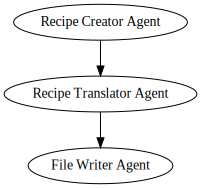

In [60]:
crew.plot()

In [61]:
crew.run()


RUNNING AGENT: Recipe Creator Agent

**Vegan Pasta Primavera Recipe**

 Servings: 4-6 people

**Ingredients:**

* 12 oz (340g) vegan pasta (such as spaghetti, linguine, or fettuccine)
* 2 tablespoons olive oil
* 1 small onion, finely chopped
* 3 cloves garlic, minced
* 2 cups (200g) mixed spring vegetables (such as broccoli, carrots, bell peppers, and mushrooms)
* 1 cup (120g) cherry tomatoes, halved
* 1 cup (250ml) vegetable broth
* 1 teaspoon dried basil
* 1 teaspoon dried oregano
* Salt and pepper to taste
* 1/4 cup (30g) nutritional yeast (optional, for cheesy flavor)
* Fresh parsley, chopped (optional, for garnish)

**Preparation Instructions:**

1. **Cook the Pasta**: Bring a large pot of salted water to a boil. Cook the pasta according to the package instructions until al dente. Reserve 1 cup of pasta water before draining.
2. **Sauté the Onion and Garlic**: In a large skillet, heat the olive oil over medium heat. Add the chopped onion and cook for 3-4 minutes, until translucen

END OF NOTEBOOK

---

